In [1]:
import cv2
import numpy as np

from skimage import data, exposure
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def preprocess_img(img_path):
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    # Normalize image
    min_bit = np.min(image)
    max_bit = np.max(image)
    image = cv2.normalize(image*16, dst=None, alpha=min_bit*16, beta=max_bit*16, norm_type=cv2.NORM_MINMAX)
    return image

def print_img(preprocessed_img, title="Image"):    
    fig, ax = plt.subplots(figsize=(9, 3))
    ax.set_title(title)
    ax.imshow(preprocessed_img, cmap=plt.cm.gray)

# Src 500um - 88hr timelapse

In [ ]:
# bf_path = "R:/Users/Rahul/Documents/494/Data/88hr timelapse/Src_500um/BF/"
# tr_path = "R:/Users/Rahul/Documents/494/Data/88hr timelapse/Src_500um/Texas Red/"
bf_path = "C:/Users/Rahul Behal/Documents/494/Data/88hr timelapse/Src_500um/BF/"
tr_path = "C:/Users/Rahul Behal/Documents/494/Data/88hr timelapse/Src_500um/Texas Red/"

## Day 0 

In [ ]:
sample_spheroid = bf_path + "scan_Plate_R_p00_0_B01f00d4.TIF"
sample_sensor = tr_path + "scan_Plate_R_p00_0_B01f00d3.TIF"

### Spheroid

In [2]:
sample_spheroid = "C:/Users/Rahul Behal\Documents/494/Data/Tiled Images for Rahul/EGFP_1mm/Day3-1C/scan_Plate_TR_p00_0_A02f00d4.TIF"

In [9]:
import time

--- 2.810976982116699 seconds ---


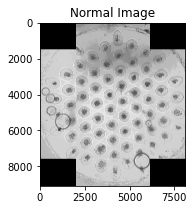

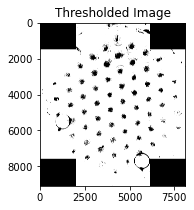

In [10]:
start_time = time.time()

threshold = 80 # Can vary between images

img = sample_spheroid
img = preprocess_img(img)

_, thresh = cv2.threshold(img, threshold, np.max(img), cv2.THRESH_BINARY)

print_img(img, "Normal Image")
print_img(thresh, "Thresholded Image")

print("--- %s seconds ---" % (time.time() - start_time))

In [15]:
start_time = time.time()

# Retrieval modes and contour approximation types found on OpenCV docs
raw_contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, 
                                       cv2.CHAIN_APPROX_NONE)

radius_range = (40, 500) # Can vary between images 

contours = [] # New contour array that only has significant contours
for contour in raw_contours:
    # Most items in raw contours are lines or small shapes
    if cv2.contourArea(contour) < (np.pi * radius_range[0] ** 2):
        continue
    contours.append(contour)    
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()

print(len(contours))
circle_coords = []
for contour in contours:
    (x, y), r = cv2.minEnclosingCircle(contour)
    if r > radius_range[1]:
        continue
    circle_coords.append((x, y, r))
    
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.9099972248077393 seconds ---
77
--- 34.370179653167725 seconds ---


All units in um (0.638 pixels/um)

--- 0.4009983539581299 seconds ---


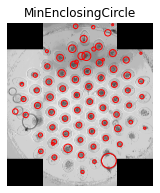

In [12]:
start_time = time.time()

scale = 0.638 # pixels / um 

verbose = False

fig, ax = plt.subplots(figsize=(9, 3))

ax.set_title("MinEnclosingCircle")
ax.imshow(img, cmap=plt.cm.gray)

print("All units in um ({} pixels/um)\n".format(scale))
for idx, circle in enumerate(circle_coords):
    x, y, r = circle[0], circle[1], circle[2]
    c = plt.Circle((x, y), r, color="red", linewidth=1, fill=False)
    
    if verbose:
        ax.text(x + r, y, str(idx+1), color='red', fontsize=15)
        
        x, y, r = x/scale, y/scale, r/scale
        print("Circle #{}:\n center (x,y): ({}, {})\n area: {}".format(idx+1,x,y,np.pi*r**2))
        
    ax.add_patch(c)
    
ax.set_axis_off()

print("--- %s seconds ---" % (time.time() - start_time))

### Sensor

In [ ]:
threshold = 150
radius_range = (10, 100)


img = sample_sensor
img = preprocess_img(img)

_, thresh = cv2.threshold(img, threshold, np.max(img), cv2.THRESH_BINARY)

print_img(img, "Normal Image")
print_img(thresh, "Thresholded Image")

# Retrieval modes and contour approximation types found on OpenCV docs
raw_contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, 
                                       cv2.CHAIN_APPROX_NONE)

contours = [] # New contour array that only has significant contours
for contour in raw_contours:
    # Most items in raw contours are lines or small shapes
    if cv2.contourArea(contour) < (np.pi * radius_range[0] ** 2):
        continue
    contours.append(contour)    

circle_coords = []
for contour in contours:
    (x, y), r = cv2.minEnclosingCircle(contour)
    if r > radius_range[1]:
        continue
    circle_coords.append((x, y, r))
    
verbose = True

fig, ax = plt.subplots(figsize=(9, 3))

ax.set_title("MinEnclosingCircle")
ax.imshow(img, cmap=plt.cm.gray)

print("All units in um ({} pixels/um)\n".format(scale))
for idx, circle in enumerate(circle_coords):
    x, y, r = circle[0], circle[1], circle[2]
    c = plt.Circle((x, y), r, color="red", linewidth=2, fill=False)
    
    if verbose:
        ax.text(x + r, y, str(idx+1), color='red', fontsize=15)
        
        scale = 0.638
        x, y, r = x/scale, y/scale, r/scale
        print("Circle #{}:\n center (x,y): ({}, {})\n area: {}".format(idx+1,x,y,np.pi*r**2))
        
    ax.add_patch(c)

In [ ]:
print_img(img)

## Day 11

In [ ]:
sample_spheroid = bf_path + "scan_Plate_R_p11_0_B01f00d4.TIF"
sample_sensor = tr_path + "scan_Plate_R_p11_0_B01f00d3.TIF"

In [3]:
sample_spheroid = "C:/Users/Rahul Behal/Documents/494/Data/Tiled Images for Rahul/Src_500um/Day3-1C/scan_Plate_TR_p00_0_B01f00d4.TIF"

### Spheroid

In [ ]:
threshold = 150
radius_range = (40, 500)


img = sample_spheroid
img = preprocess_img(img)

_, thresh = cv2.threshold(img, threshold, np.max(img), cv2.THRESH_BINARY)

print_img(img, "Normal Image")
print_img(thresh, "Thresholded Image")

# Retrieval modes and contour approximation types found on OpenCV docs
raw_contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, 
                                       cv2.CHAIN_APPROX_NONE)

contours = [] # New contour array that only has significant contours
for contour in raw_contours:
    # Most items in raw contours are lines or small shapes
    if cv2.contourArea(contour) < (np.pi * radius_range[0] ** 2):
        continue
    contours.append(contour)    

circle_coords = []
for contour in contours:
    (x, y), r = cv2.minEnclosingCircle(contour)
    if r > radius_range[1]:
        continue
    circle_coords.append((x, y, r))
    
verbose = True

fig, ax = plt.subplots(figsize=(9, 3))

ax.set_title("MinEnclosingCircle")
ax.imshow(img, cmap=plt.cm.gray)

print("All units in um ({} pixels/um)\n".format(scale))
for idx, circle in enumerate(circle_coords):
    x, y, r = circle[0], circle[1], circle[2]
    c = plt.Circle((x, y), r, color="red", linewidth=2, fill=False)
    
    if verbose:
        ax.text(x + r, y, str(idx+1), color='red', fontsize=15)
        
        scale = 0.638
        x, y, r = x/scale, y/scale, r/scale
        print("Circle #{}:\n center (x,y): ({}, {})\n area: {}".format(idx+1,x,y,np.pi*r**2))
        
    ax.add_patch(c)

In [ ]:
threshold = 120
radius_range = (40, 500)


img = sample_spheroid
img = preprocess_img(img)

_, thresh = cv2.threshold(img, threshold, np.max(img), cv2.THRESH_BINARY)
print_img(thresh)

### Sensor -- Ellipse

In [ ]:
threshold = 70

img = preprocess_img(sample_sensor)

_, thresh = cv2.threshold(img, threshold, np.max(img), cv2.THRESH_BINARY)

print_img(img, "Normal Image")
print_img(thresh, "Thresholded Image")

In [ ]:
raw_contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, 
                                       cv2.CHAIN_APPROX_NONE)

In [ ]:
# Sensors
radius_range = (10, 500)

contours = []
for contour in raw_contours:
    # Most items in raw contours are lines or small shapes
    if cv2.contourArea(contour) < (np.pi * radius_range[0] ** 2):
        continue
    contours.append(contour)

ellipse_coords = []
for contour in contours:
    (x,y),(w,h),ang = cv2.fitEllipse(contour)
    if max(w,h) > radius_range[1]:
        continue
    ellipse_coords.append(((x,y),(w,h),ang))

In [ ]:
verbose = True

fig, ax = plt.subplots(figsize=(9, 3))

ax.set_title("FitEllipse")
ax.imshow(img, cmap=plt.cm.gray)

for idx, ellipse in enumerate(ellipse_coords):
    (x,y), (w,h), ang = ellipse
    
    e = Ellipse((x,y), w, h, ang, color="red", linewidth=2, fill=False)
    
    if verbose: 
        ax.text(x + w, y, str(idx+1), color='red', fontsize=15)
        
        scale = 0.638
        x, y, w, h = x/scale, y/scale, w/scale, h/scale
        
        # OpenCV to ImageJ Angle Conversion
        if ang > 90:
            ang = 270 - ang
        else:
            ang = 90 - ang
        
        area = w * h * np.pi / 4
        print("Ellipse #{}:\n center (x,y): ({}, {})\n area: {}, major: {}, minor: {}, angle: {}".format(idx+1,x,y,area,max(w,h),min(w,h),ang))
        
    ax.add_patch(e)

## OpenCV Display

In [ ]:
sample_spheroid = bf_path + "scan_Plate_R_p11_0_B01f00d4.TIF"
sample_sensor = tr_path + "scan_Plate_R_p11_0_B01f00d3.TIF"

In [ ]:
threshold = 70

img = preprocess_img(sample_sensor)

_, thresh = cv2.threshold(img, threshold, np.max(img), cv2.THRESH_BINARY)

print_img(img, "Normal Image")
print_img(thresh, "Thresholded Image")

In [ ]:
raw_contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, 
                                       cv2.CHAIN_APPROX_NONE)

In [ ]:
# Sensors
radius_range = (10, 500)

contours = []
for contour in raw_contours:
    # Most items in raw contours are lines or small shapes
    if cv2.contourArea(contour) < (np.pi * radius_range[0] ** 2):
        continue
    contours.append(contour)

ellipse_coords = []
for contour in contours:
    (x,y),(w,h),ang = cv2.fitEllipse(contour)
    if max(w,h) > radius_range[1]:
        continue
    ellipse_coords.append(((x,y),(w,h),ang))

In [ ]:
new_image = img

In [ ]:
cv2.imshow("fdsafe", new_image)
cv2.waitKey(0)    
cv2.destroyAllWindows()  

In [ ]:
verbose = True

fig, ax = plt.subplots(figsize=(9, 3))

ax.set_title("FitEllipse")
ax.imshow(img, cmap=plt.cm.gray)

for idx, ellipse in enumerate(ellipse_coords):
    (x,y), (w,h), ang = ellipse
    
    e = Ellipse((x,y), w, h, ang, color="red", linewidth=2, fill=False)
    
    if verbose: 
        ax.text(x + w, y, str(idx+1), color='red', fontsize=15)
        
        scale = 0.638
        x, y, w, h = x/scale, y/scale, w/scale, h/scale
        
        # OpenCV to ImageJ Angle Conversion
        if ang > 90:
            ang = 270 - ang
        else:
            ang = 90 - ang
        
        area = w * h * np.pi / 4
        print("Ellipse #{}:\n center (x,y): ({}, {})\n area: {}, major: {}, minor: {}, angle: {}".format(idx+1,x,y,area,max(w,h),min(w,h),ang))
        
    ax.add_patch(e)

In [ ]:
temp = [((5,2),2),3,2,1]

In [1]:
from numpy import pi

In [2]:
pi

3.141592653589793

In [1]:
t = ["a","b","c"]

In [5]:
"fsf"[0:2]

'fs'